Open in colab: https://colab.research.google.com/github/Thanaritt-K/Zipfs-Law-Exp/blob/main/experiment.ipynb

First, we need to install some dependencies used in this experiment

In [442]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [443]:
pip install datasets==3.6.0 

Note: you may need to restart the kernel to use updated packages.


In [444]:
pip install -U transformers


Note: you may need to restart the kernel to use updated packages.


In [445]:
pip install -U huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [446]:
pip install attacut

Note: you may need to restart the kernel to use updated packages.


In [525]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [526]:
pip scipy

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "scipy"



Through Hugging Face, the data can be downloaded using their function call.
https://huggingface.co/datasets/airesearch/scb_mt_enth_2020

In [447]:
from datasets import load_dataset
ds = load_dataset("airesearch/scb_mt_enth_2020", 'enth', trust_remote_code=True)

Next, DataFrame is used for handling and filtering this dataset

In [ ]:
import pandas as pd
df = pd.DataFrame(ds["train"]) #Number of pairs (train, valid, test): 801,402 | 100,173 | 100,177

In [449]:
df['subdataset'].unique()

array(['aqdf_corpus', 'wikipedia_corpus', 'mozilla_corpus',
       'paracrawl_corpus', 'assorted_government_corpus',
       'singapore_corpus', 'fake_reviews_hope', 'task_master_corpus',
       'paraphrase_corpus', 'fake_reviews_yn', 'fake_reviews_crowd',
       'mfa_corpus', 'thai_websites_corpus'], dtype=object)

In [450]:
data_task_master_1_only = df[df['subdataset']=="task_master_corpus"]

An example of a translation pair from the task_master corpus

In [451]:
data_task_master_1_only.iloc[0]['translation']

{'en': "Hi, I'm looking to book a table for Korean fod.",
 'th': 'สวัสดีค่ะ ช่วยจองร้านอาหารเกาหลีให้หน่อยได้มั้ยคะ?'}

Example of how to obtain an english sentence from dataset

In [452]:
data_task_master_1_only.iloc[0]['translation'].get('en')

"Hi, I'm looking to book a table for Korean fod."

Next we seperate each translation pair into individual lists for easier handling. Here, we can set 'sentence_limit' to smaller number for smaller experimentation

In [453]:
engtext = []
thaitext = []
i = 0
sentence_limit = 100000
while i < sentence_limit:
    engtext.append(data_task_master_1_only.iloc[i]['translation'].get('en'))
    thaitext.append(data_task_master_1_only.iloc[i]['translation'].get('th'))
    i = i + 1

An example of the English sentences

In [477]:
engtext[0:5]

["Hi, I'm looking to book a table for Korean fod.",
 'Ok, what area are you thinking about?',
 'Somewhere in Southern NYC, maybe the East Village?',
 "That's great. So I need a table for tonight at 7 pm for 8 people. We don't want to sit at the bar, but anywhere else is fine.",
 "They don't have any availability for 7 pm."]

An example of the Thai sentences

In [478]:
thaitext[0:5]

['สวัสดีค่ะ ช่วยจองร้านอาหารเกาหลีให้หน่อยได้มั้ยคะ?',
 'ได้เลยค่ะ แถวไหนดีคะ?',
 'แถว ๆ นิวยอร์คทางใต้ก็ได้ค่ะ แถวอีสต์วิลเลจอะไรงี้',
 'เยี่ยมค่ะ อยากได้โต๊ะแปดคนตอนทุ่มนึงค่ะ นั่งตรงไหนก็ได้แต่ไม่เอาตรงบาร์นะคะ',
 'ไม่มีโต๊ะว่างตอนทุ่มนึงเลยค่ะ']

Next, we lowercase the sentences, tokenize them using whitespaces, and then remove their punctuation marks that could be found at phrase boundaries

In [ ]:
import re
i = 0
engtext_tokenized = []
while i < sentence_limit:
    text = engtext[i]
    text = text.lower()
    
    engtext_tokenized.append(re.split(r'[\s\.\,\?]', text))
    i = i + 1
    

An example of tokenized and cleaned English sentences

In [490]:
engtext_tokenized[0:5]

[['hi',
  '',
  "i'm",
  'looking',
  'to',
  'book',
  'a',
  'table',
  'for',
  'korean',
  'fod',
  ''],
 ['ok', '', 'what', 'area', 'are', 'you', 'thinking', 'about', ''],
 ['somewhere',
  'in',
  'southern',
  'nyc',
  '',
  'maybe',
  'the',
  'east',
  'village',
  ''],
 ["that's",
  'great',
  '',
  'so',
  'i',
  'need',
  'a',
  'table',
  'for',
  'tonight',
  'at',
  '7',
  'pm',
  'for',
  '8',
  'people',
  '',
  'we',
  "don't",
  'want',
  'to',
  'sit',
  'at',
  'the',
  'bar',
  '',
  'but',
  'anywhere',
  'else',
  'is',
  'fine',
  ''],
 ['they', "don't", 'have', 'any', 'availability', 'for', '7', 'pm', '']]

Next, for Thai sentences, we first need to use Attacut (https://github.com/PyThaiNLP/attacut) for quick tokenization (for 100k sentences, this took me half an hour), and then we remove the question mark, as sometimes it is used in (written) conversational register.

In [458]:
from attacut import tokenize, Tokenizer

i = 0
thaitext_tokenized = []
while i < sentence_limit:
    text = thaitext[i]
    text = re.sub(r'[\?]', '', text)
    thaitext_tokenized.append(tokenize(text))
    i = i + 1


An example of tokenized and cleaned Thai sentences

In [491]:
thaitext_tokenized[0:5]

[['สวัสดี',
  'ค่ะ',
  ' ',
  'ช่วย',
  'จอง',
  'ร้าน',
  'อาหาร',
  'เกาหลี',
  'ให้',
  'หน่อย',
  'ได้',
  'มั้ย',
  'คะ'],
 ['ได้', 'เลย', 'ค่ะ', ' ', 'แถว', 'ไหน', 'ดี', 'คะ'],
 ['แถว',
  ' ',
  'ๆ',
  ' ',
  'นิวยอร์ค',
  'ทาง',
  'ใต้',
  'ก็',
  'ได้',
  'ค่ะ',
  ' ',
  'แถว',
  'อีสต์วิลเลจ',
  'อะไร',
  'งี้'],
 ['เยี่ยม',
  'ค่ะ',
  ' ',
  'อยาก',
  'ได้',
  'โต๊ะ',
  'แปด',
  'คน',
  'ตอน',
  'ทุ่ม',
  'นึง',
  'ค่ะ',
  ' ',
  'นั่ง',
  'ตรง',
  'ไหน',
  'ก็ได้',
  'แต่',
  'ไม่',
  'เอา',
  'ตรง',
  'บาร์',
  'นะ',
  'คะ'],
 ['ไม่', 'มี', 'โต๊ะ', 'ว่าง', 'ตอน', 'ทุ่ม', 'นึง', 'เลย', 'ค่ะ']]

Flattening the list of list of data, as we don't need to preserve their sentence boundaries

In [460]:
def flatten(xss):
    return [x for xs in xss for x in xs]
engtext_tokens = flatten(engtext_tokenized)
thaitext_tokens = flatten(thaitext_tokenized)

An example of English tokens found in the dataset

In [493]:
engtext_tokens[0:10]

['hi', '', "i'm", 'looking', 'to', 'book', 'a', 'table', 'for', 'korean']

An example of Thai tokens found in the dataset

In [494]:
thaitext_tokens[0:10]

['สวัสดี',
 'ค่ะ',
 ' ',
 'ช่วย',
 'จอง',
 'ร้าน',
 'อาหาร',
 'เกาหลี',
 'ให้',
 'หน่อย']

Next we calculate each word's frequency and preview top 10 most frequent words. Here, we can set 'most_common_word_limit' to smaller or bigger number, depends on how much data points we want to see from the least frequent spectrum.

In [547]:
from collections import Counter
from itertools import islice

most_common_word_limit = 50
engtext_freq = dict(Counter(engtext_tokens).most_common(most_common_word_limit))
del engtext_freq['']
list(islice(engtext_freq.items(), 10))

[('you', 34903),
 ('the', 28293),
 ('i', 24380),
 ('to', 24280),
 ('a', 19861),
 ('for', 17239),
 ('is', 16545),
 ('and', 16499),
 ('that', 12248),
 ('it', 12178)]

In [548]:
thaitext_freq = dict(Counter(thaitext_tokens).most_common(most_common_word_limit))
del thaitext_freq[' ']
list(islice(thaitext_freq.items(), 10))

[('ค่ะ', 59616),
 ('คะ', 47895),
 ('ที่', 24924),
 ('ได้', 23067),
 ('นะ', 22095),
 ('มี', 18419),
 ('ให้', 18082),
 ('จะ', 17567),
 ('โอเค', 13992),
 ('แล้ว', 13826)]

First, we can use the data points we calculated to show Zipf's law, a law stating that the frequency of any word in a dataset is inversely proportional to its rank.

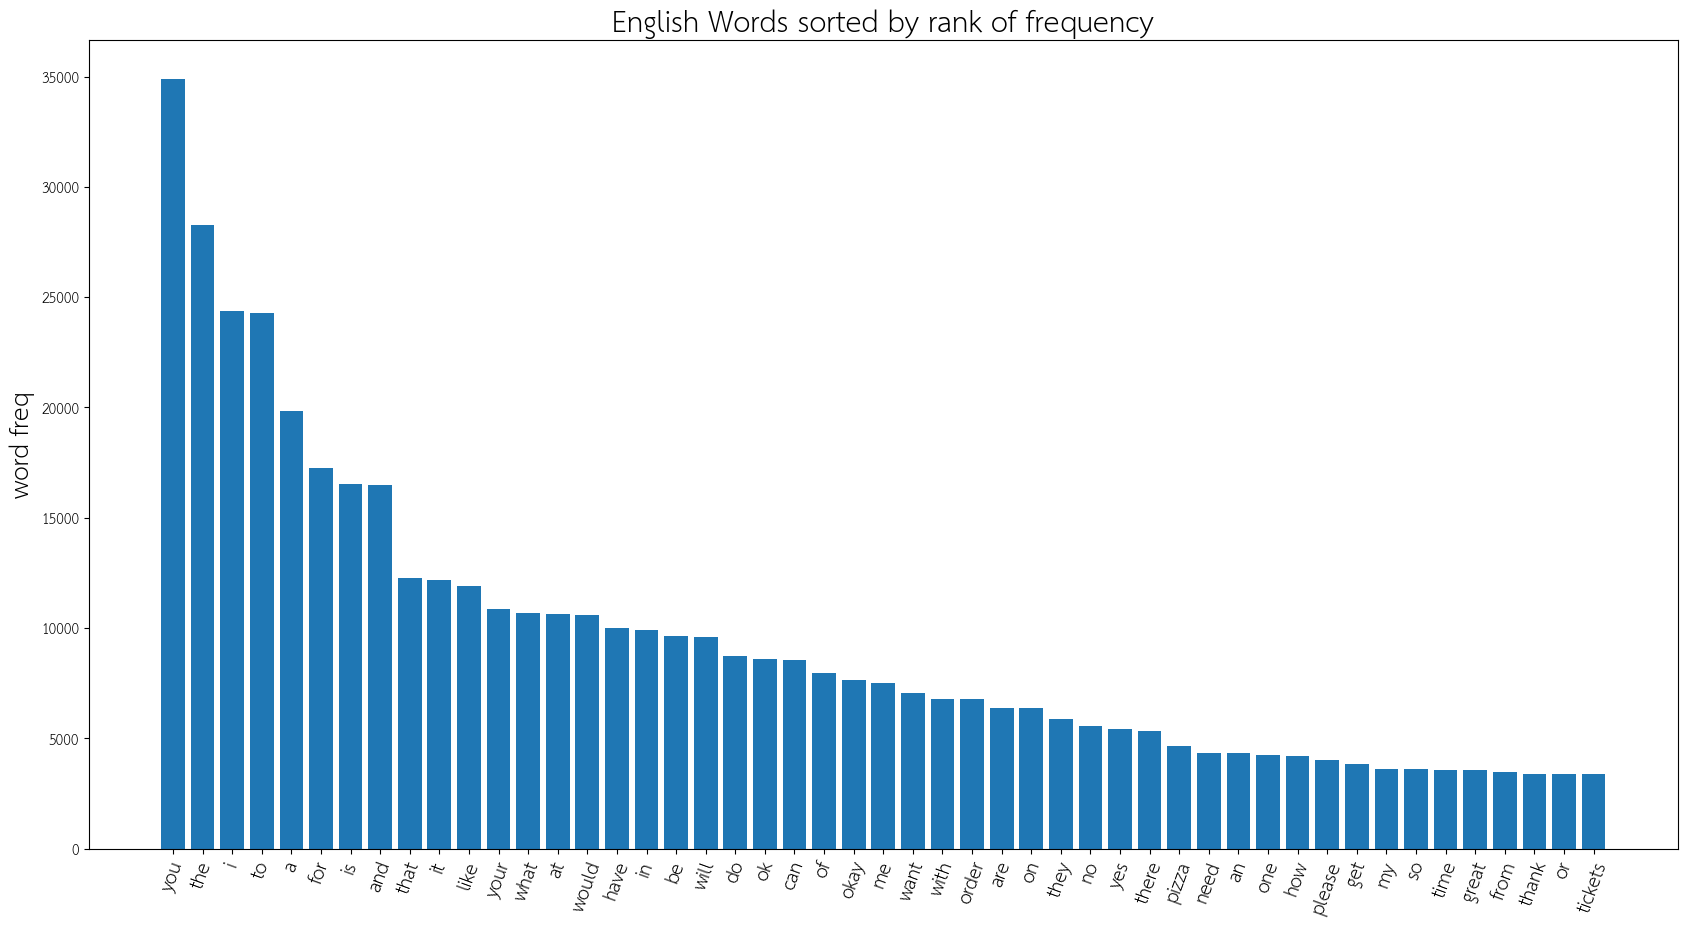

In [549]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

plt.bar(range(len(engtext_freq)), engtext_freq.values(), align='center')
plt.xticks(range(len(engtext_freq)), list(engtext_freq.keys()))
plt.xticks(fontsize=13, rotation=70)
plt.ylabel('word freq', fontsize = 17)
plt.title('English Words sorted by rank of frequency', fontsize = 20)
fig = plt.gcf()
fig.set_size_inches(20.5, 10.5)
plt.show()

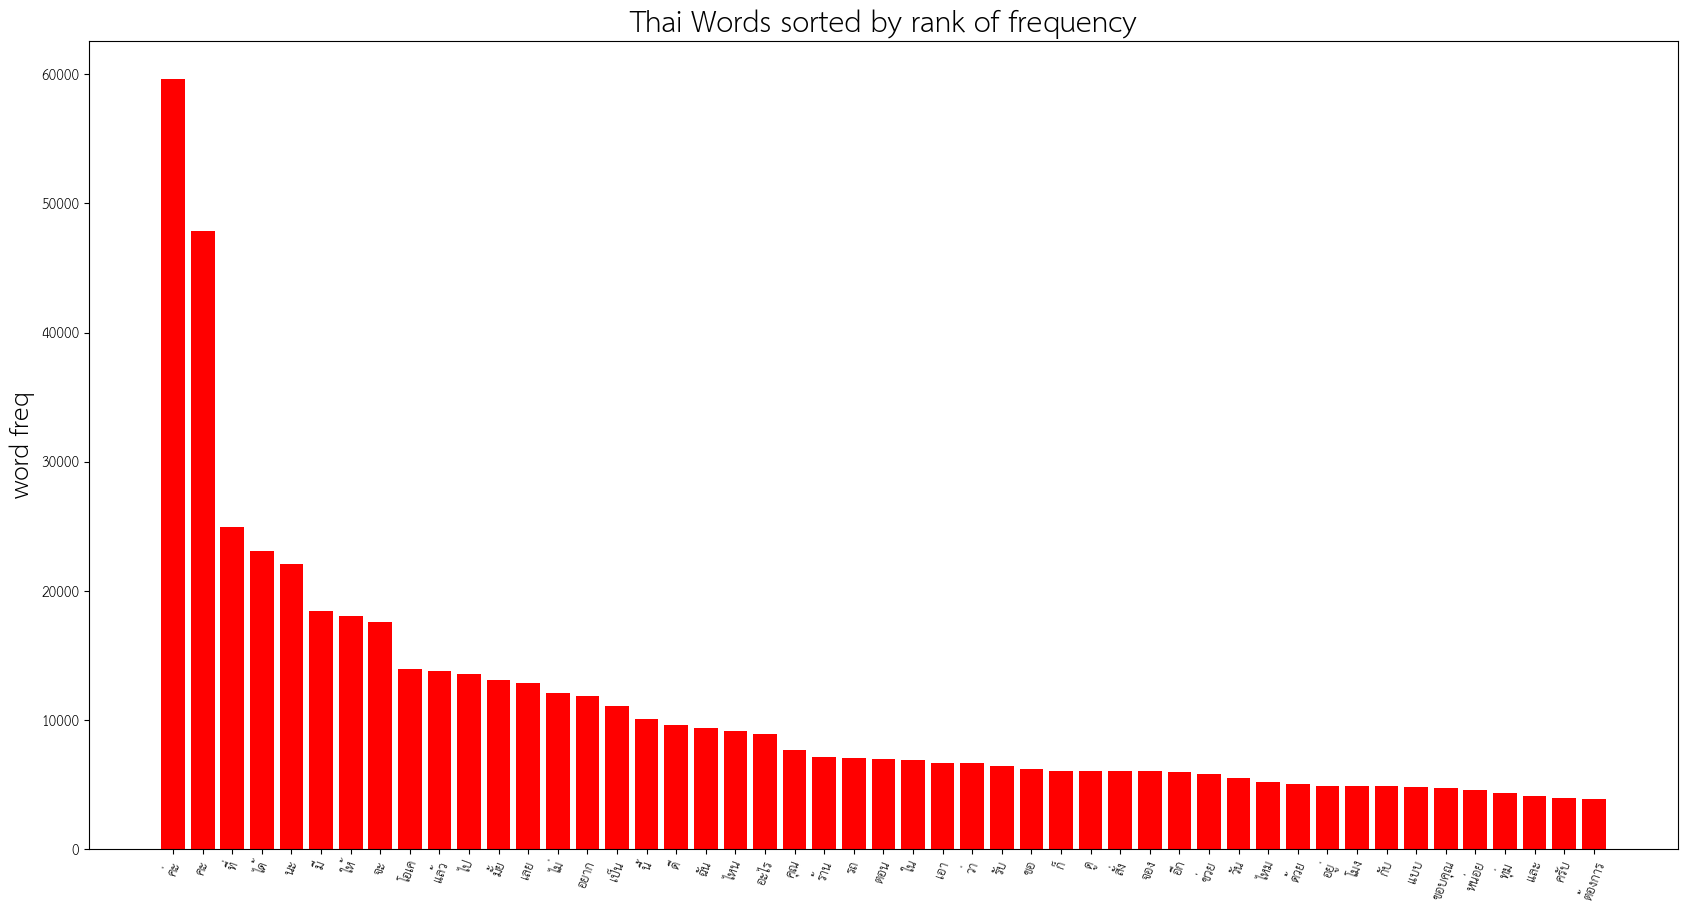

In [550]:
import matplotlib.font_manager as font_manager
plt.bar(range(len(thaitext_freq)), thaitext_freq.values(), align='center', color='red')
plt.xticks(range(len(thaitext_freq)), list(thaitext_freq.keys()))
plt.xticks(fontsize=9, rotation=70)
plt.ylabel('word freq', fontsize = 17)
plt.title('Thai Words sorted by rank of frequency', fontsize = 20)
font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
plt.rc('font', family='TH Sarabun New')
fig = plt.gcf()
fig.set_size_inches(20.5, 10.5)
plt.show()

Next, we can use the other data points to show Zipf's law of abbrevietion, a law stating that the frequency of any word is inversely proportional to its length.
We can also change 'most_common_word_limit' to see more or less of the data points as well.

In [551]:
most_common_word_limit = 100000

engtext_freq = dict(Counter(engtext_tokens).most_common(most_common_word_limit))
del engtext_freq['']

engtext_freq_len = {}
for x,y in engtext_freq.items():
    engtext_freq_len[x] = len(x)
list(islice(engtext_freq_len.items(), 10))


[('you', 3),
 ('the', 3),
 ('i', 1),
 ('to', 2),
 ('a', 1),
 ('for', 3),
 ('is', 2),
 ('and', 3),
 ('that', 4),
 ('it', 2)]

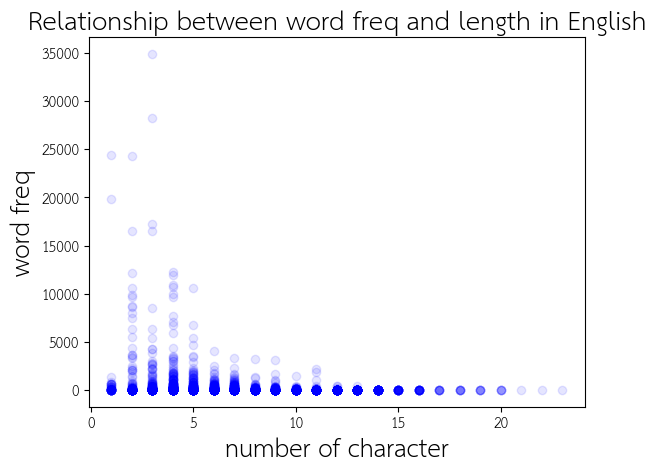

In [556]:
plt.scatter(engtext_freq_len.values(), engtext_freq.values(), color='blue', alpha = 0.1)
plt.ylabel('word freq', fontsize = 17)
plt.xlabel('number of character', fontsize = 17)
plt.title('Relationship between word freq and length in English', fontsize = 18)
plt.show()

In [558]:
thaitext_freq = dict(Counter(thaitext_tokens).most_common(most_common_word_limit))
del thaitext_freq[' ']

thaitext_freq_len = {}
for x,y in thaitext_freq.items():
    thaitext_freq_len[x] = len(x)
list(islice(thaitext_freq_len.items(), 10))

[('ค่ะ', 3),
 ('คะ', 2),
 ('ที่', 3),
 ('ได้', 3),
 ('นะ', 2),
 ('มี', 2),
 ('ให้', 3),
 ('จะ', 2),
 ('โอเค', 4),
 ('แล้ว', 4)]

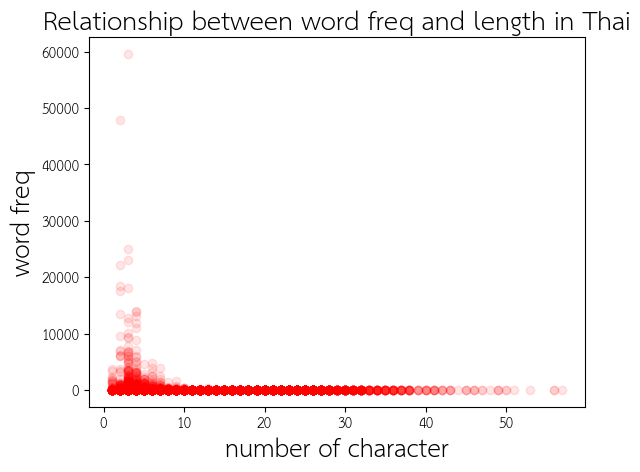

In [559]:
plt.scatter(thaitext_freq_len.values(), thaitext_freq.values(), color='red', alpha = 0.1)
plt.ylabel('word freq', fontsize = 17)
plt.xlabel('number of character', fontsize = 17)
plt.title('Relationship between word freq and length in Thai', fontsize = 18)
plt.show()

Lastly, we calculate Kendall’s tau, a correlation measure for ordinal data, along with p-value of this experiment. A negative tau value shows disagreement between two rankings. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

In [560]:
from scipy import stats
x1 = list(engtext_freq.values())
x2 = list(engtext_freq_len.values())
res = stats.kendalltau(x1, x2)
print(res.statistic)
print(res.pvalue)

-0.13091244229700372
1.037161082367433e-120


In [561]:
x1 = list(thaitext_freq.values())
x2 = list(thaitext_freq_len.values())
res = stats.kendalltau(x1, x2)
print(res.statistic)
print(res.pvalue)

-0.2538759525849771
0.0
